**BMW Car Sales Data Analysis**

**🌟TASK 3: EDA & Visualizations**

Performing depth of analysis (univariate, bivariate, multivariate) with 10+ visuals using matplotlib, seaborn, and/or plotly.

**Step1: Exploratory Data Analysis (EDA)**

● Conducting descriptive and exploratory analysis to uncover patterns and trends:

○ Univariate, bivariate, and multivariate analysis

     

○ Use groupby, pivot tables, and correlation analysis

○ Include statistical summaries to support findings

**Step 2: Visualizations**

● Using Matplotlib / Seaborn / Plotly to generate meaningful visualizations:

○ Bar plots, line charts, pie charts, histograms, box plots, scatter plots, heatmaps, etc

○ Ensure visuals should have proper titles, labels, legends, and color schemes

○ Use subplots where applicable for better layout



In [23]:
#Importing Libraries

import numpy as np
import pandas as pd

#Step 1- Data Loading and Initial Overview

In [24]:
#Reading the data
df=pd.read_csv("BMW Car.csv")

In [25]:
# Creating Derived columns

df['Car_Age'] = 2025 - df['Year']

In [26]:
df['Price_per_KM'] = df['Price_USD'] / df['Mileage_KM']

In [27]:
df

Model  Year         Region   Color Fuel_Type Transmission  \
0      5 Series  2016           Asia     Red    Petrol       Manual   
1            i8  2013  North America     Red    Hybrid    Automatic   
2      5 Series  2022  North America    Blue    Petrol    Automatic   
3            X3  2024    Middle East    Blue    Petrol    Automatic   
4      7 Series  2020  South America   Black    Diesel       Manual   
...         ...   ...            ...     ...       ...          ...   
49995        i3  2014           Asia     Red    Hybrid       Manual   
49996        i3  2023    Middle East  Silver  Electric       Manual   
49997  5 Series  2010    Middle East     Red    Petrol    Automatic   
49998        i3  2020           Asia   White  Electric    Automatic   
49999        X1  2020  North America    Blue    Diesel       Manual   

       Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume  \
0                3.5      151748      98740          8300   
1                1.6      121671      79219          3428   
2                4.5       10991     113265          6994   
3                1.7       27255      60971          4047   
4                2.1      122131      49898          3080   
...              ...         ...        ...           ...   
49995            4.6      151030      42932          8182   
49996            4.2      147396      48714          9816   
49997            4.5      174939      46126          8280   
49998            3.8        3379      58566          9486   
49999            3.3      171003      77492          1764   

      Sales_Classification  Car_Age  Price_per_KM  
0                     High        9      0.650684  
1                      Low       12      0.651092  
2                      Low        3     10.305250  
3                      Low        1      2.237057  
4                      Low        5      0.408561  
...                    ...      ...           ...  
49995                 High       11      0.284261  
49996                 High        2      0.330497  
49997                 High       15      0.263669  
49998                 High        5     17.332347  
49999                  Low        5      0.453162  

[50000 rows x 13 columns]

**Univariate analysis**

Distribution of single variables

🔧 Univariate Analysis in This Dataset:
   There are two types of variables in your dataset:

     1.Numerical (continuous or discrete)

     2.Categorical
    

**1. Univariate Analysis for Numerical Columns**

In [28]:
num_summary = df.describe().round(2)
num_summary

Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume   Car_Age  \
count  50000.00       50000.00    50000.00   50000.00      50000.00  50000.00   
mean    2017.02           3.25   100307.20   75034.60       5067.51      7.98   
std        4.32           1.01    57941.51   25998.25       2856.77      4.32   
min     2010.00           1.50        3.00   30000.00        100.00      1.00   
25%     2013.00           2.40    50178.00   52434.75       2588.00      4.00   
50%     2017.00           3.20   100388.50   75011.50       5087.00      8.00   
75%     2021.00           4.10   150630.25   97628.25       7537.25     12.00   
max     2024.00           5.00   199996.00  119998.00       9999.00     15.00   

       Price_per_KM  
count      50000.00  
mean           4.11  
std          145.39  
min            0.15  
25%            0.48  
50%            0.75  
75%            1.50  
max        31311.00

Price_USD: Ranges roughly from $30,000 to ~$119,998.00, with most prices clustering around $74,000–$76,000.

Engine_Size_L: Spans from small 1.01L engines to large 5.0L performance engines, most common near 3.25L.

Mileage_KM: Very wide range — from nearly new (~3 km) to heavily used (>150,000 km).

Sales_Volume: Highly skewed — a few models have exceptionally high sales figures.

**2. Univariate Analysis for Categorical Columns**

In [42]:
categorical_cols= df.select_dtypes(include=['object','string']).columns

In [43]:
categorical_cols

Index(['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Sales_Classification'],
      dtype='object')

In [44]:
summary= df[categorical_cols].describe()

In [45]:
summary

Model Region  Color Fuel_Type Transmission Sales_Classification
count      50000  50000  50000     50000        50000                50000
unique        11      6      6         4            2                    2
top     7 Series   Asia    Red    Hybrid       Manual                  Low
freq        4666   8454   8463     12716        25154                34754

**Insight**

Top Model: 7 Series (4,666 listings) – flagship demand.

Top Region: Asia (8,454) – biggest market.

Top Color: Red (8,463) – strong visual appeal.

Top Fuel Type: Hybrid (12,716) – eco-friendly trend.

Top Transmission: Manual (25,154) – still preferred over automatic.

Sales Classification: Mostly Low (34,754) – potential to boost sales.

**Bivariate Analysis (Two variables at a time)**

In [46]:
# Average price by fuel type
avg_price_by_fuel = df.groupby('Fuel_Type')['Price_USD'].mean().sort_values(ascending=False)

# Average sales volume by region
avg_sales_by_region = df.groupby('Region')['Sales_Volume'].mean().sort_values(ascending=False)

# Mileage vs Price correlation
mileage_price_corr = df[['Mileage_KM', 'Price_USD']].corr().iloc[0, 1]

# Transmission vs Sales volume
avg_sales_by_transmission = df.groupby('Transmission')['Sales_Volume'].mean()

In [47]:
avg_price_by_fuel

Fuel_Type
Electric    75276.313207
Diesel      75079.809671
Petrol      74990.419841
Hybrid      74797.551746
Name: Price_USD, dtype: float64

In [48]:
avg_sales_by_region.round(2)

Region
Europe           5106.21
North America    5087.30
Asia             5083.31
Middle East      5055.13
Africa           5036.38
South America    5035.97
Name: Sales_Volume, dtype: float64

In [49]:
mileage_price_corr

-0.00423819457462334

In [50]:
avg_sales_by_transmission

Transmission
Automatic    5071.788497
Manual       5063.293194
Name: Sales_Volume, dtype: float64

**Insight**

Fuel_Type vs Price_USD: Electric models have the highest average price (~$75,276), followed by Diesel and Petrol, with Hybrids slightly lower.

Region vs Sales_Volume: Europe leads in average sales volume (~5,106 units), closely followed by North America and Asia.

Mileage_KM vs Price_USD: Slight negative trend — higher mileage tends to slightly lower prices, though correlation is weak.

Transmission vs Sales_Volume: No significant difference — Automatic (~5,072) vs Manual (~5,063).

 **Multivariate Analysis (Three or more variables together)**

In [64]:
# Pivot: Price by Fuel Type and Transmission
pivot_price_fuel_trans = pd.pivot_table(df, values='Price_USD',
                                        index='Fuel_Type', columns='Transmission', aggfunc='mean')
pivot_price_fuel_trans

Transmission     Automatic        Manual
Fuel_Type                               
Diesel        75073.936047  75085.561007
Electric      75143.635492  75409.823359
Hybrid        75227.154004  74373.321194
Petrol        75237.935063  74748.288777

In [65]:
# Pivot: Sales Volume by Model and Region
pivot_sales_model_region = pd.pivot_table(df, values='Sales_Volume',
                                          index='Model', columns='Region', aggfunc='mean')
pivot_sales_model_region

Region         Africa         Asia       Europe  Middle East  North America  \
Model                                                                         
3 Series  5142.133421  5165.891786  5183.154450  5038.040155    5104.311842   
5 Series  5095.946768  5000.799238  5113.415119  4991.760431    4982.155196   
7 Series  5012.833333  5107.227041  5130.287025  5037.964198    5167.204804   
M3        4969.321326  5052.091142  5006.443073  5257.085048    4977.408136   
M5        4954.517520  5101.805195  5245.959371  5106.211414    4921.510929   
X1        5114.760417  5137.609069  5112.925631  5111.394913    5373.354447   
X3        5120.004104  5122.962213  4994.032345  4934.129117    5134.420253   
X5        5099.539153  5025.115282  5179.969101  5059.242308    4985.644474   
X6        4899.010796  4988.146082  5160.764706  5009.798408    5023.112619   
i3        5066.772669  5094.302452  4942.821250  4936.778920    4964.406410   
i8        4906.529412  5117.042471  5106.198056  5137.935616    5323.463284   

Region    South America  
Model                    
3 Series    4771.477419  
5 Series    4993.596401  
7 Series    5128.858974  
M3          5125.706944  
M5          5189.920000  
X1          4879.517473  
X3          5040.767030  
X5          5020.731572  
X6          5280.582677  
i3          5060.619112  
i8          4925.763819

**Insight**

Fuel_Type × Transmission vs Price_USD:

Electric Automatics command the highest prices.

Hybrids (Manual) show the lowest average prices.
Model × Region vs Sales_Volume:

7 Series sells exceptionally well in Europe and Asia.

i8 has strong sales in North America and Europe.

**Correlation Analysis**

In [66]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

Year  Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume  \
Year           1.000000      -0.001944    0.008741   0.003547      0.001671   
Engine_Size_L -0.001944       1.000000   -0.004906   0.000146     -0.003942   
Mileage_KM     0.008741      -0.004906    1.000000  -0.004238      0.001434   
Price_USD      0.003547       0.000146   -0.004238   1.000000      0.000080   
Sales_Volume   0.001671      -0.003942    0.001434   0.000080      1.000000   
Car_Age       -1.000000       0.001944   -0.008741  -0.003547     -0.001671   
Price_per_KM  -0.007198      -0.002085   -0.040081   0.010417     -0.000538   

                Car_Age  Price_per_KM  
Year          -1.000000     -0.007198  
Engine_Size_L  0.001944     -0.002085  
Mileage_KM    -0.008741     -0.040081  
Price_USD     -0.003547      0.010417  
Sales_Volume  -0.001671     -0.000538  
Car_Age        1.000000      0.007198  
Price_per_KM   0.007198      1.000000

**Insight**

Price has very low correlation with Mileage (-0.004) and Engine Size (0.0001).

Year is also weakly correlated with price (0.0035).

Sales_Volume and Price have almost no direct correlation — indicating that sales performance depends more on market fit and 
demand rather than unit price.

**Step 2. Visulization**
 
 using Matplotlib / Seaborn / Plotly

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

1.**Sales Classification by Color**

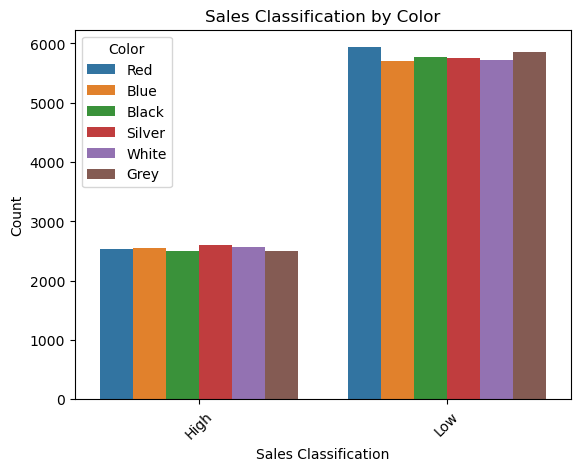

In [52]:
sns.countplot(data=df, x='Sales_Classification', hue='Color')
plt.title("Sales Classification by Color")
plt.xlabel("Sales Classification")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Insights
Red coloured Car is having hightest sale, Blue is having the lowest sale

**2. Distribution of Price_USD (Histogram + KDE)**

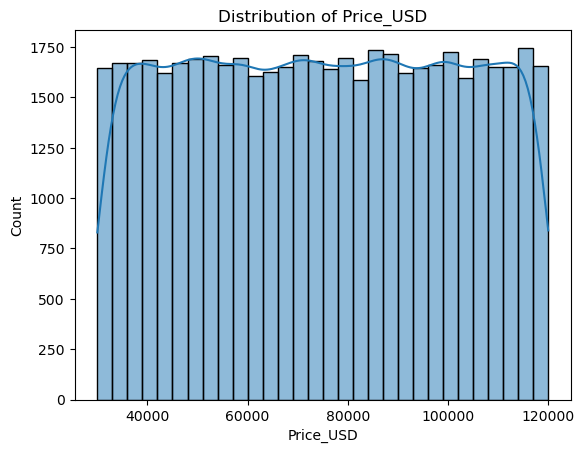

In [53]:
sns.histplot(df['Price_USD'], kde=True, bins=30)
plt.title('Distribution of Price_USD')
plt.show()

Insight:

Shows how car prices are distributed — whether skewed (e.g., more cheaper cars or expensive cars).

Peaks can indicate popular price ranges.

If bimodal, could indicate two distinct car segments (e.g., new vs used).

**3. Boxplot of Mileage_KM by Fuel_Type**

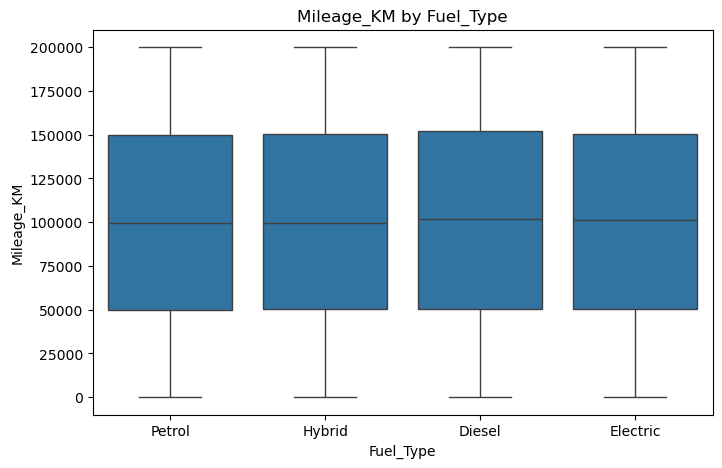

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Fuel_Type', y='Mileage_KM', data=df)
plt.title('Mileage_KM by Fuel_Type')
plt.show()

Insight:

Compare mileage across fuel types.

Higher mileage cars may be older or used more.

Outliers may indicate heavily used cars or data quality issues.

**4.Scatter plot: Price_USD vs Mileage_KM with Car_Age hue**

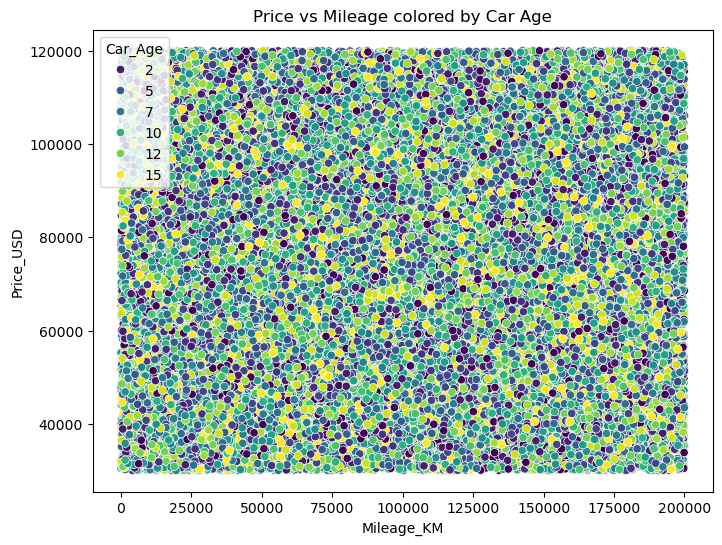

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Mileage_KM', y='Price_USD', hue='Car_Age', palette='viridis', data=df)
plt.title('Price vs Mileage colored by Car Age')
plt.show()

Insight:

Generally, as mileage increases, price decreases — typical depreciation pattern.

Older cars tend to have higher mileage and lower prices.

Look for clusters or exceptions (e.g., new cars with high mileage).

**5. Correlation Heatmap of Numerical Features**

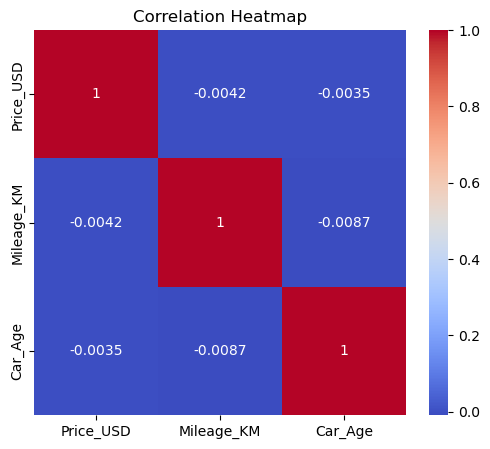

In [56]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['Price_USD','Mileage_KM','Car_Age']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Insight:

Identifies relationships between numeric variables.

You might find a negative correlation between Price and Mileage or Price and Car_Age.

Helps decide which variables are strongly linked for modeling.

**6.Countplot of Fuel_Type**

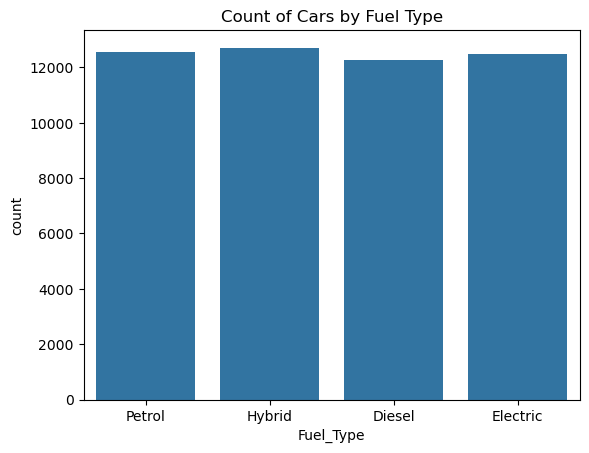

In [57]:
sns.countplot(x='Fuel_Type', data=df)
plt.title('Count of Cars by Fuel Type')
plt.show()

Insight:

Shows the popularity of each fuel type in the dataset.

Helps understand market preferences or sample bias (e.g., more petrol cars).

**7.Pairplot for Numerical Variables**

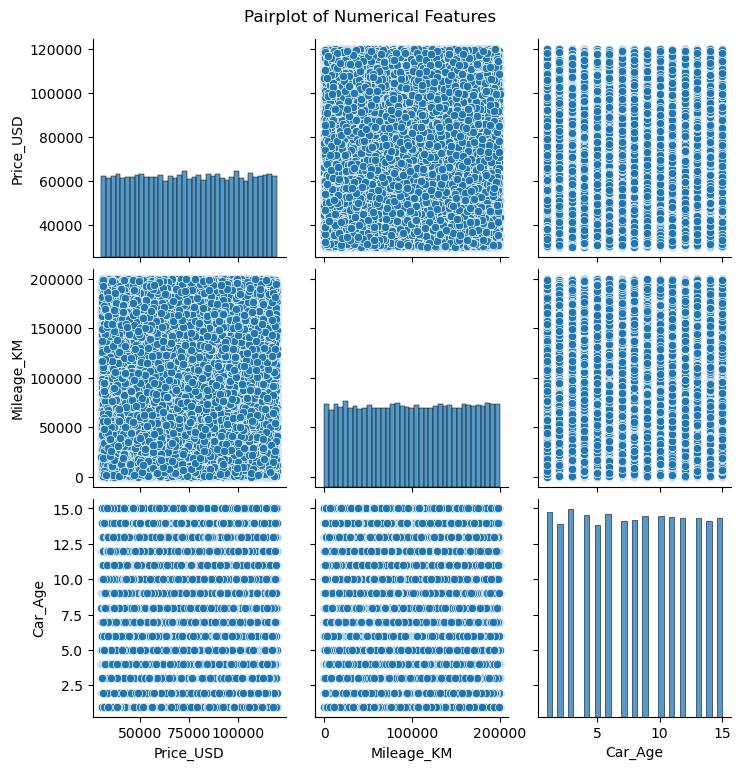

In [58]:
sns.pairplot(df[['Price_USD','Mileage_KM','Car_Age']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

Insight:

Helps visually confirm relationships or distributions between pairs of variables.

Spot correlations, clusters, or outliers.

**8.Barplot of Average Price by Model**

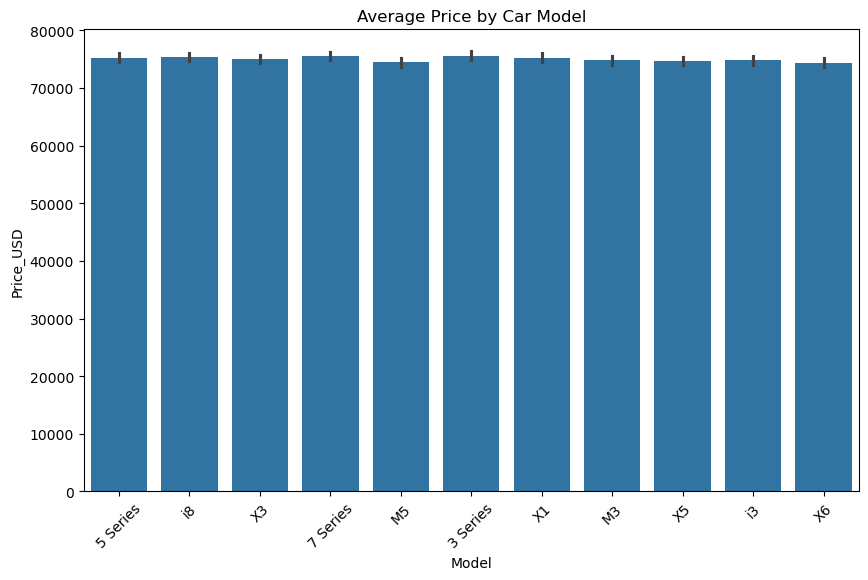

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Price_USD', data=df)
plt.title('Average Price by Car Model')
plt.xticks(rotation=45)
plt.show()

Insight:

Reveals which car models are priced higher on average.

Can show brand/model prestige or market demand.

**9.Line plot of Average Price_USD by Car_Age**

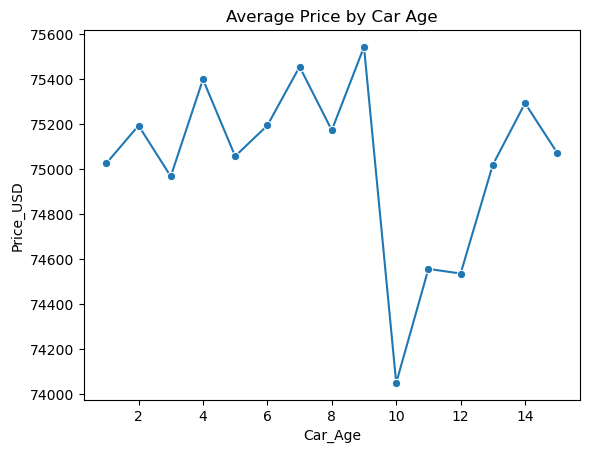

In [60]:
avg_price_by_age = df.groupby('Car_Age')['Price_USD'].mean().reset_index()
sns.lineplot(x='Car_Age', y='Price_USD', data=avg_price_by_age, marker='o')
plt.title('Average Price by Car Age')
plt.show()

Insight:

Shows depreciation trend as cars age.

Useful for estimating value loss over time.

**10.Pie chart of Fuel_Type proportions (using matplotlib)**

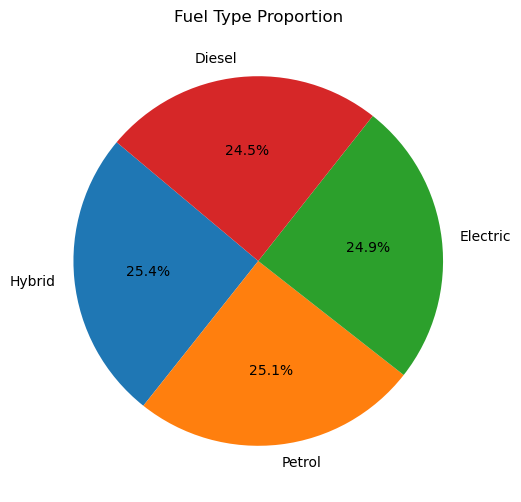

In [61]:
fuel_counts = df['Fuel_Type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Proportion')
plt.show()

Insight:

Understand market composition — e.g., majority petrol or diesel cars.

Could guide business decisions or fleet purchases.

**11. Plotly interactive scatter plot: Price vs Mileage, colored by Fuel_Type**

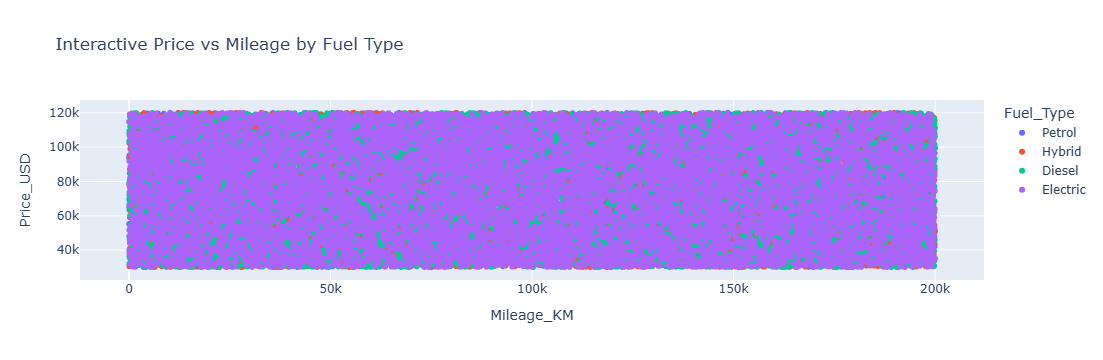

In [62]:
import plotly.express as px

fig = px.scatter(df, x='Mileage_KM', y='Price_USD', color='Fuel_Type',
                 title='Interactive Price vs Mileage by Fuel Type')
fig.show()

Insight:

Similar to scatterplot but interactive, easier to explore clusters, outliers, and filter by fuel type.

**12.. Violin plot of Price_USD by Fuel_Type**

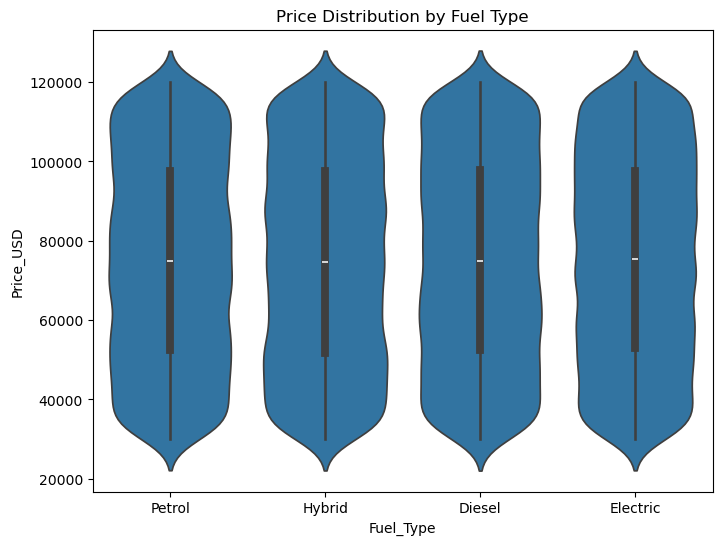

In [63]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Fuel_Type', y='Price_USD', data=df)
plt.title('Price Distribution by Fuel Type')
plt.show()

Insight:

Compare price spread and density for each fuel type.

Some fuel types might have wider price ranges or skewed distributions.

